<h2><center>NLP Text Classification<center></h2>

## Code Content:
- [Importing dataset + choosing columns](#s1)
- [Cleaning entries (Removal and selection)](#s2)
- [Stopword removal + Regular expression](#s3)
- [Frequency distribution + removal of more stopwords](#s4)
- [Lemmatization](#s5)
- [Lexical diversity](#s6)
- [Text representation: WordCloud](#s7)
- [Text representation: TF-IDF](#s8)
- [Baseline performance](#s9)
- [Classification approach](#s10)

## I. Introduction
### 1.1 Domain-specific area
This project provides an analysis of textual data on Twitter to accurately detect and classify sentiment trends in Tweets using sentiment analysis techniques. This would provide businesses with a tool that takes in a corpus of text for training to analyse the sentiment of tweets and assist in understanding the needs of their target audience.

### 1.2 Objectives
While existing algorithms have been centered around the detection of cyberbullying on social media (Cynthia Van Hee et al., 2018), this project aims to broaden the scope of detection by focusing on sentiment analysis. Developing a sentiment analyzer to detect positive and negative sentiments in texts lets businesses or content creators to understand the emotional sentiments related to their content distributed or to be created. This helps in the improvement and diversity of sentiment detection tools.

### 1.3 Dataset
To begin this project, an extensive amount of textual data corpora is required. After researching large datasets of Tweets, "Twitter Tweets Sentiment Dataset" on Kaggle was proven to be the best for this project. With 27.5 thousand tweets extracted using the Twitter API, the authors have categorised each tweet to have either a positive, neutral or negative sentiment, which is beneficial for the algorithm to categorise textual input by sentiment.

The dataset consists of the textID, text (the original Tweets), selected_text (defined as the Tweets that do not have redundant information) and the sentiment of the tweet. This project will only focus on positive and negative sentiments.

### 1.4 Evaluation methodology
The evaluation will be run by using the Machine Learning models Logistic Regression, Random Forest Classifier and Support Vector Machines. As each classifier are suitable for different types of data, the evaluation focuses on the performance of each classifier to find the most suitable model for training.

This will be evaluated by Accuracy and Precision of each training model. The following are the formulas for accuracy and precision. Accuracy is the percentage of correct predictions out of all predictions made, whereas precision is the number of accurately predicted positives over all predicted positives.<br><br>

$$\text{Accuracy} = \frac{\text{Number of Correct Predictions (TP+TN)}}{\text{Number of all Predictions (TP+TN+FP+FN)}}$$

$$\text{Precision} = \frac{\text{Number of Correctly Predicted Positives (TP)}}{\text{Number of Total Positives Predicted (TP+FP)}}$$

<br>** TP: true positives, FP: false positives, TN: true negatives, FN: false negatives

## II. Implementation
### 2.1 Preparation of dataset

#### Importing libraries
- **pandas library** was imported to process and handle datasets in Python. It is used to help write and read from CSV files while handling real-world messy data and processing them into a proper format

- **numpy library** was imported to handle calculations and use numpy arrays for statistical calculations

- **matplotlib library** was imported to plot the data and represent it graphically

- **os library** was imported to have a way of using the operating system dependent functionalities, more specifically to save the dataset as a CSV

- **stopwords library** was imported to have a library of the most common words in data to aid in stopwords removal

- **collections.Counter library** is a dictionary subclass that counts the frequency of elements. This helps to check for additional common words being used

- **WordNetLemmatizer library** was imported to perform lemmatization on words. It reduces words to its base or dictionary form, known as the lemma

- **re library** was imported as a flexible pattern matching algorithm. It helps in generalising words to aid in complex text processing

- **train_test_split library** was imported to split the large dataset into separate training and testing subsets for evaluating the performance of the models on unseen data

- **TfidfVectorizer and CountVectorizer library** were imported to evaluate which vector would be more suitable for the sentimental analysis based on the nature of the data

- **LogisticRegression, RandomForestClassifier and SVC library** were the chosen classifiers used to evaluate the text sentiment classifier. Each model excels in different aspects of the data

- **accuracy_score, classification_report library** were imported to assess the performance of the classification models. It helps with understanding the predictive capibilities of each model

In [1]:
# The following block of code was self-written
# dataframes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# text processing and analysis
#import nltk
# stop words library
from stop_words import get_stop_words
# analysing text corpora
from collections import Counter

# stemming and lemmatization
from nltk.stem import WordNetLemmatizer
# regular expressions
import re

# baseline performance
from sklearn.model_selection import train_test_split
# TF-IDF and Count vectorisers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# models used
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# classification accuracy
from sklearn.metrics import accuracy_score, classification_report

#### Helper function
As the dataset will be saved at each section for easier access to the CSV based on each progressive step, the saving step will be changed to a function. This is done as the dataset will be saved after each milestone.

In [2]:
# The following block of code was self-written
def save_to_csv(df,file_path):
    if not os.path.exists(file_path):
        df.to_csv(file_path, index = False)
        print("File saved successfully.")
    else:
        print("File already exists.")

<a id = "s1"></a>
#### Acquiring and Importing dataset
The dataset on the collection of Tweets were acquired from Kaggle by downloading the CSV file.<br>The owner of this dataset is M Yasser H.

To check that the dataset is ready for cleaning and analysis, we will look at the first entry to check if there are headers. Since there are headers, and the dataset contains only relevant information, the text, and sentiment, the headers will just be modified to "tweet" and "sentiment" for better comprehension.

In [3]:
# The following block of code was self-written
df = pd.read_csv("datasets/twitter_sentiments.csv", nrows = 1)
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral


In [4]:
# The following block of code was self-written
tweets_df = pd.read_csv("datasets/twitter_sentiments.csv")
tweets_df = tweets_df[["selected_text", "sentiment"]]
tweets_df.columns = ["tweet", "sentiment"]
tweets_df.head()

,tweet,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD,negative
2,bullying me,negative
3,leave me alone,negative
4,"Sons of ****,",negative


### 2.2 Pre-processing
The dataset that will be used in this analysis consists of the tweets that were cleaned by the owner of the dataset, M Yasser H., and the sentiment of the tweet will be transformed from a multiclass classification of "positive", "neutral" and "negative" to a binary classification of "positive" and "negative". The data is stored as a CSV file and is imported using Python Pandas to create a dataframe.

Completed steps:
- Removing NaN and duplicated entries
- Removing neutral sentiment entries, storing locally
- Pre-processing (basic text processing)
    - Removal of stop words + Tokenization + Regex
    - Frequency distribution (removal of additional stop words)
    - Lemmatization
    - Lexical diversity
    - Text representation: TF-IDF

<a id = "s2"></a>
#### Removing NaN entries
To ensure that the dataset contains only required information, we will check and remove any entries that have missing values.

#### Removing duplicated entries
To ensure that the analysis is beneficial, all entriesshould be unique. A "duplicated" column will be added to the a temporary copy of the dataset which is the output of the duplicated() function and we will print only columns where the "duplicated" column is True. Based on the output, it is seen that there are some duplicated Tweets.

#### Nature of Data
Although the dataset is seen to have an minutely imbalanced nature between negatives and positives and the focus is to detect positive and negative sentiments. As such all entries that do not have a neutral sentiment.

<b>The following blocks of code was self-written with references</b>
<br>checking for duplicates: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
<br>creation of sample from large dataframe: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html

In [5]:
# The following block of code was self-written
sentiments = tweets_df["sentiment"].value_counts(dropna = False)
print("sentiments before cleaning:\n\n", sentiments)

# Removing NaN values
tweets_df.dropna(inplace = True)
# Removing duplicate entries
tweets_df.drop_duplicates(inplace = True)

sentiments = tweets_df["sentiment"].value_counts(dropna = False)
print("sentiments after cleaning:\n\n", sentiments)

sentiments before cleaning:

 sentiment
neutral     11118
positive     8582
negative     7781
Name: count, dtype: int64
sentiments after cleaning:

 sentiment
neutral     11111
negative     5861
positive     5537
Name: count, dtype: int64


In [6]:
# The following block of code was self-written
tweets_df = tweets_df[tweets_df["sentiment"] != "neutral"]

# Resetting index
tweets_df.reset_index(drop = True, inplace = True)
print("positive sentiments:", tweets_df[tweets_df["sentiment"] == "positive"].shape[0])
print("neutral sentiments:", tweets_df[tweets_df["sentiment"] == "neutral"].shape[0])
print("negative sentiments:", tweets_df[tweets_df["sentiment"] == "negative"].shape[0])

positive sentiments: 5537
neutral sentiments: 0
negative sentiments: 5861


The tweets_df will now be saved into a new dataset for easier accessibility.<br>To ensure that no duplicates are saved, a simple path checking will be used.

In [7]:
# The following block of code was self-written
filename = "datasets/posNeg_twitter_sentiments.csv"
save_to_csv(tweets_df ,filename)
tweets_df = pd.read_csv(filename)

File already exists.


#### Basic text processing
To begin the process of analysing the text, we would require conducting basic text processing methods on cleaned data.

Cleaning:
- Removal of stop words + Regex
- Removal of additional stop words
- Lemmatization

Text Processing:
- Frequency distribution
- Lexical diversity
- Text representation - TF-IDF

<a id = "s3"></a>
#### Removing stop words
In human language, it is very common for stop words to be present. These words, including **determiners** (eg: the, a, this, my), **conjunctions** (eg: and, or, nor, but, whereas) and **prepositions** (eg: against, along, at, before), are used to connect thoughts and speech to form grammatically accurate sentences or structural cohesion.

While important during communication amongst one another, they do not carry importance or sentiments that would be valuable to this project, thus introducing noise. The removal would help to streamline the process to focus on words that would contribute more meaning to the sentiment of Tweets.

** tokenization will be done in lowercase as all stopwords are in lowercase.

#### Regular expression (Regex)
To ensure that the analysis is only on alphabetical inputs, the use of Regex will remove all non-alphabetical characters. Regex is a tool commonly used for pattern matching and text manipulation. By searching for characters using rules and patterns, these words will be reduced. For this project, Regex is used to remove all non-alphabetical tokens as the sentimental analysis focuses on words.

A better Regex function was created (clean_text_input2) to remove any elongated words as it is a common occurance in human language, however it was seen that the output was not as successful as using the original Regex function (clean_text_input) as some words that have multiple consecutive words would be changed (eg: "good" would be reduced to "god", which are 2 different meanings). As such, clean_text_input was chosen to conduct Regex.

<b>The following block of code was self-written with reference</b>
<br>using lambda: https://www.w3schools.com/python/python_lambda.asp

In [8]:
# The following block of code was self-written
# Get stopword list
stop_words = get_stop_words("english")

# Checking removal works on a test text
test_tweet = "This is a test that Stopword removal works."

tokens = test_tweet.lower().split()
# Removing each token if part of stop_words
filtered_tokens = [token for token in tokens if token not in stop_words]
print("Filtered from", len(tokens), "to", len(filtered_tokens))

Filtered from 8 to 4


In [9]:
# The following block of code was self-written
tweets = tweets_df["tweet"].tolist()

filtered_tweets = []
for tweet in tweets:
    tokens = tweet.lower().split()
    # Removing each token if part of stop_words
    filtered_tokens = [token for token in tokens if token not in stop_words]
    filtered_tweet = " ".join(filtered_tokens)  # Convert tokens to a string
    filtered_tweets.append(filtered_tweet)

tweets_df["filtered_tweet"] = filtered_tweets
tweets_df["filtered_tweet"].replace("", np.nan, inplace = True)
tweets_df.dropna(inplace = True)

In [10]:
# The following block of code was self-written
# Removing all non alphabetical tokens
def clean_text_input(text):
    cleaned_text = re.sub(r"[^a-zA-Z ]", "", text)
    cleaned_text = re.sub(r"\s+", " ", cleaned_text)
    return cleaned_text.strip()

# While this is better to remove any elongated speech, but doesn"t work well for TF-IDF
def clean_text_input2(text):
    cleaned_text = re.sub(r"(\S)\1+", r"\1", text)
    cleaned_text = re.sub(r"\d+", "", cleaned_text)
    cleaned_text = re.sub(r"[^\w\s]", "", cleaned_text)
    cleaned_text = re.sub(r"\s+", " ", cleaned_text)
    return cleaned_text.strip()

print(clean_text_input("testing that 200000 is remooooved?"))

# Apply cleaning to each row of "filtered_tweet"
tweets_df["filtered_tweet"] = tweets_df["filtered_tweet"].apply(clean_text_input)
tweets_df["filtered_tweet"].replace("", np.nan, inplace = True)
tweets_df.dropna(inplace = True)
tweets_df.head()

testing that is remooooved


,tweet,sentiment,filtered_tweet
0,Sooo SAD,negative,sooo sad
1,bullying me,negative,bullying
2,leave me alone,negative,leave alone
3,"Sons of ****,",negative,sons
4,fun,positive,fun


<a id = "s4"></a><br>
The removal of stopwords has reduced the texts. Due to the dataset chosen having the column named as "selected_text" which is cleaned tweets done by the owner, as well as the cleaning of stopwords, and additional use of Regex, the text will now be examined.

#### Frequency distribution
By making use of the **collections.Counter library**, it would allow the most used words to be displayed. Based on the output, it is seen that there are additional stopwords that were not in the stopwords library that should be removed. As such, the stopwords will be removed such that the top 30 used words are not stopwords. (Words that do not seem to have a positive or negative sentiment will be considered a "stopword" in this stage. As some stopwords paired with other non-stopwords may change the sentiment, words that carry negations will not be removed.)

<b>The following blocks of code was self-written with reference</b>
<br>collections library: https://www.digitalocean.com/community/tutorials/python-counter-python-collections-counter

In [11]:
# The following block of code was self-written
# Concatenate all tokenized words together
tokenized_words = []
for tweet in tweets_df["filtered_tweet"]:
    tokens = tweet.split()
    for t in tokens:
        tokenized_words.append(t)
        
word_counts = Counter(tokenized_words)

im: 619
good: 594
day: 501
love: 435
happy: 380


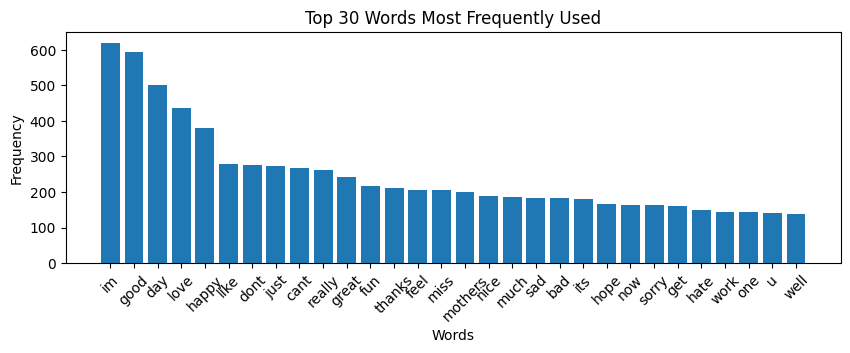

In [12]:
# The following block of code was self-written
# Displays top 10 used words and their frequencies
most_used_words = word_counts.most_common(5)
for word, count in most_used_words:
    print(f"{word}: {count}")

# Get top 30 most used words
most_used_words = word_counts.most_common(30)
# Extract the words and their frequencies
words, frequencies = zip(*most_used_words)

# Plot the word frequencies
plt.figure(figsize = (10, 3))
plt.bar(words, frequencies)

# Labelling and title
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 30 Words Most Frequently Used")
# Rotate x-axis labels if needed
plt.xticks(rotation = 45)
plt.show()

#### Removal of additional stopwords

In [13]:
# The following block of code was self-written
most_used_words = word_counts.most_common(60)
words_to_remove = []
for word, count in most_used_words:
    words_to_remove.append(f"{word}")
print(words_to_remove)

['im', 'good', 'day', 'love', 'happy', 'like', 'dont', 'just', 'cant', 'really', 'great', 'fun', 'thanks', 'feel', 'miss', 'mothers', 'nice', 'much', 'sad', 'bad', 'its', 'hope', 'now', 'sorry', 'get', 'hate', 'work', 'one', 'u', 'well', 'thats', 'you', 'today', 'go', 'it', 'awesome', 'going', 'time', 'got', 'thank', 'best', 'will', 'wish', 'sick', 's', 'night', 'oh', 'better', 'e', 'still', 'sucks', 'think', 'feeling', 'lol', 'cool', 'want', 'see', 'tired', 'amazing', 'pretty']


In [14]:
# The following block of code was self-written
words_to_remove = ["im", "day", "just", "fel", "mothers", "its", 
                   "now", "get", "you", "one", "u", "go", "today", "thats", 
                   "so", "it", "oh", "going", "time", "got", "wil", "s", 
                   "night", "aw", "e", "stil", "think", "feling", "se", "col"]

print(60 - len(words_to_remove))

tweets_df["filtered_tweet"] = tweets_df["filtered_tweet"].apply(lambda tweet: " ".join(
    word for word in tweet.split() if word.lower() not in words_to_remove))

# Removing NaN values after cleaning
tweets_df["filtered_tweet"].replace("", np.nan, inplace = True)
tweets_df.dropna(inplace = True)

30


In [15]:
# The following block of code was self-written
# Concatenate all tokenized words together
tokenized_words = []
for tweet in tweets_df["filtered_tweet"]:
    tokens = tweet.split()
    for t in tokens:
        tokenized_words.append(t)
        
word_counts = Counter(tokenized_words)

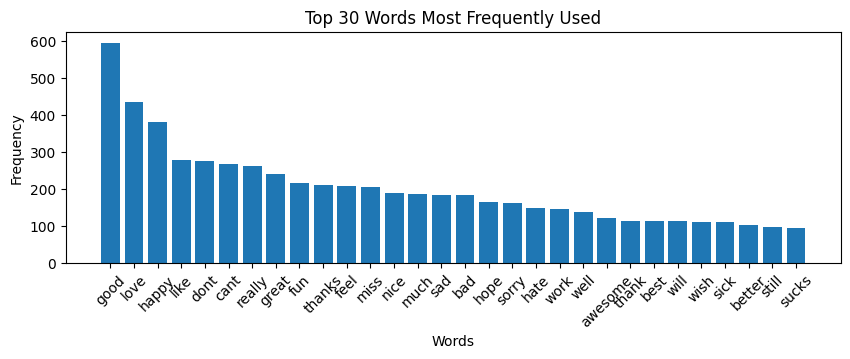

In [16]:
# The following block of code was self-written
# Get top 30 most used words
most_used_words = word_counts.most_common(30)
# Extract the words and their frequencies
words, frequencies = zip(*most_used_words)

# Plot the word frequencies
plt.figure(figsize=(10, 3))
plt.bar(words, frequencies)

# Labelling and title
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 30 Words Most Frequently Used")
# Rotate x-axis labels if needed
plt.xticks(rotation = 45)
plt.show()

In [17]:
# The following block of code was self-written
filename = "datasets/filtered_twitter_sentiments.csv"
save_to_csv(tweets_df, filename)
tweets_df = pd.read_csv(filename)

File already exists.


<a id = "s5"></a>
#### Lemmatization
Lemmatization is the process of grouping reducing words to their root form. This was chosen when in comparison to stemming as stemming only focuses on just chopping off words at the end to reach the "stem" of the word (ie: "greater" would be reduced to "great") whereas lemmatization focuses on finding the base word (ie: "greater" can be reduced to "good").

This was done by running lemmatizer.lemmatize() on each word that was tokenised for each row in the "filtered_tweet" column. these words would be joined back into a string to be added to a new column "lemmatized_tweet".

<b>The following blocks of code was self-written with reference</b>
<br>understanding lemmatization: https://www.geeksforgeeks.org/python-lemmatization-with-nltk/

In [18]:
# The following block of code was self-written
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Iterate through the rows of the dataframe
for index, row in tweets_df.iterrows():
    tweet_string = row["filtered_tweet"]
    
    # Perform lemmatization on the tweet string
    lemmatized_words = [lemmatizer.lemmatize(word) for word in tweet_string.split()]
    lemmatized_string = " ".join(lemmatized_words)
    
    # Update the dataframe with the lemmatized string
    tweets_df.at[index, "lemmatized_tweet"] = lemmatized_string

# Proof that there are changes
diff = sum(tweets_df["filtered_tweet"] != tweets_df["lemmatized_tweet"])
print("Number of entries lemmatized:", diff)

Number of entries lemmatized: 1856


In [19]:
# The following block of code was self-written
filename = "datasets/lemma_twitter_sentiments.csv"
save_to_csv(tweets_df, filename)
tweets_df = pd.read_csv(filename)

File already exists.


<a id = "s6"></a>
#### Lexical diversity
Lexical analysis is used as a metric to measure the variety or richness of the vocabulary used in a text corpora.<br>This helps to gain understanding to the complexity of the data being used.<br><br>

$$\text{Lexical Diversity} = \frac{\text{Total Number of Unique Words}}{\text{Total Number of Words}}$$

<br>Based on the output, the language used in both positive and negative sentiments are of similar complexity. This suggests that the vocabulary used and linguistic complexity are similar across both sentiments. This is a valid statement as the dataset inputs used for the project consists of already modified tweets by the owner of the dataset.

In [20]:
# The following block of code was self-written
positive_sentiments = tweets_df[tweets_df["sentiment"] == "positive"]
negative_sentiments = tweets_df[tweets_df["sentiment"] == "negative"]

positive_tokens = positive_sentiments["lemmatized_tweet"].str.split()
negative_tokens = negative_sentiments["lemmatized_tweet"].str.split()

def calc_lexicalDiversity(tokens):
    # Exclude empty string from tokens
    tokens = [token for token in tokens if token]
    # Counts all tokens
    total_tokens = sum(len(token) for token in tokens)
    # Creates set of unique tokens
    unique_tokens = set(token for sublist in tokens for token in sublist)
    # Counts set of unique tokens
    unique_total_tokens = len(unique_tokens)
    return unique_total_tokens / total_tokens

positive_lexical_diversity = calc_lexicalDiversity(positive_tokens)
negative_lexical_diversity = calc_lexicalDiversity(negative_tokens)

print("positive lexical diversity:", positive_lexical_diversity)
print("negative lexical diversity:", negative_lexical_diversity)

positive lexical diversity: 0.2418831168831169
negative lexical diversity: 0.2711410232442201


<a id = "s7"></a>
#### Text representation - WordCloud

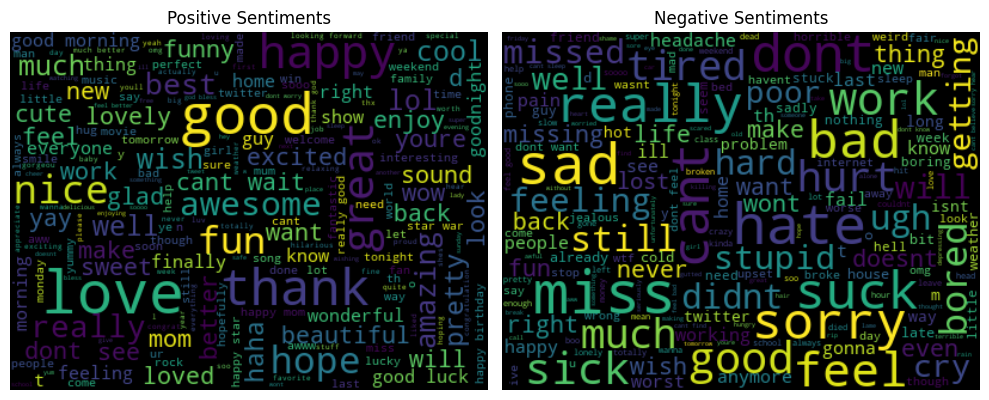

In [46]:
def plot_wc(words, title):
    wordcloud = WordCloud(width = 400, height = 300, background_color = "black", random_state = 21, max_font_size = 50).generate(words)
    plt.imshow(wordcloud, interpolation = "bilinear")
    plt.axis("off")
    plt.title(title)

pos_words = ' '.join(positive_sentiments['lemmatized_tweet'])
neg_words = ' '.join(negative_sentiments['lemmatized_tweet'])

plt.figure(figsize=(10, 5))

# Plot positive word cloud on the left (subplot 1)
plt.subplot(1, 2, 1)
plot_wc(pos_words, "Positive Sentiments")

# Plot negative word cloud on the right (subplot 2)
plt.subplot(1, 2, 2)
plot_wc(neg_words, "Negative Sentiments")

plt.tight_layout()  # Adjusts spacing between subplots for better appearance
plt.show()

<a id = "s8"></a>
#### Text representation - TF-IDF
Term Frequency-Inverse Document Frequency (TF-IDF) is defined as the calculation of how relevant a word is to a corpus of text. This will be chosen as the text representation as TF-IDF is widely used to determine the importance of words within textual data. This will be beneficial when conducting the [Baseline performance](#s7) and [Classification approach](#s8) as TF-IDF tends to be more reliable than the frequencies of words.

As the textual data is large, a better representation of the relevance of words would be to add a parameter "min_df" of 100 to display only feature words that appear at least 100 times.

<b>The following blocks of code was self-written with heavy reference</b>
<br>TF-IDF: https://en.wikipedia.org/wiki/Tf%E2%80%93idf

In [90]:
# The following block of code was self-written
# Initialize the vectorizer
vectorizer = TfidfVectorizer(min_df = 100)

# Fit the vectorizer to "lemmatized_tweet" column
tfidf_matrix = vectorizer.fit_transform(tweets_df["lemmatized_tweet"])

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()
# Get the corresponding TF-IDF values
tfidf_array = tfidf_matrix.toarray()

print("Feature Names:", feature_names)

Feature Names: ['awesome' 'bad' 'best' 'better' 'cant' 'dont' 'feel' 'fun' 'good' 'great'
 'happy' 'hate' 'hope' 'like' 'love' 'make' 'miss' 'much' 'nice' 'really'
 'sad' 'sick' 'sorry' 'suck' 'thank' 'thanks' 'want' 'well' 'will' 'wish'
 'work']


<a id = "s9"></a>
### 2.3 Baseline performance
The collection of data is first split such that 70% of the dataset can be used to train the models while 30% of the dataset can be used to check the accuracy. The baseline model being used is the Multinomial Naive Bayes Classifier (NB) as it is normally used for text classification.

To consider which vector to use for the Classification approach, the NB model was ran both with a Count vectorizer, which focuses on the occurance of each word, and a TF-IDF vectorizer, which uses a vector based on the learnt vocabulary. However, as the outputs were both the same, the decision to conduct the other models with both vectorizers was decided on.

<b>The following blocks of code was self-written with heavy reference</b>
<br>Train-test split: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [91]:
# The following block of code was writen based on scikit-learn
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tweets_df["lemmatized_tweet"], tweets_df["sentiment"],
                                                    test_size = 0.3, random_state = 42)

In [92]:
# The following block of code was self-written
# Create Count vectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train the Naive Bayes classifier
naiveBayesModel = MultinomialNB()
naiveBayesModel.fit(X_train_vectorized, y_train)

# Predict the labels for the test set
y_pred = naiveBayesModel.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.8537444933920705
Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.87      0.86      1788
    positive       0.85      0.84      0.84      1617

    accuracy                           0.85      3405
   macro avg       0.85      0.85      0.85      3405
weighted avg       0.85      0.85      0.85      3405



In [93]:
# The following block of code was self-written
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train the Naive Bayes classifier
naiveBayesModel = MultinomialNB()
naiveBayesModel.fit(X_train_vectorized, y_train)

# Predict the labels for the test set
y_pred = naiveBayesModel.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.8537444933920705
Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.87      0.86      1788
    positive       0.85      0.84      0.84      1617

    accuracy                           0.85      3405
   macro avg       0.85      0.85      0.85      3405
weighted avg       0.85      0.85      0.85      3405



<a id = "s10"></a>
### 2.4 Classification approach
The 3 models chosen to compare with the baseline model, NB, were Logistic Regression (LR), Random Forest Classifier (RF) and Support Vector Machines (SVM). These were chosen as they are known to be popular classifiers in NLP.

LR is known to be beneficial in binary classification tasks like sentiment analysis and spam detection. RF is known to combine decision trees to help with predictive accuracy and reduce overfitting. This is normally used for classification or regression tasks. SVM is seen as a powerful model for classification or regression tasks as well, but is heavily used for text classification tasks like sentiment analysis.

This would suggest that all 3 models are suitable for this project, which aims to conduct sentiment analysis to accurately conduct binary classification.

In [94]:
# The following block of code was self-written
# Create Count vectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train the logistic regression classifier
logreModel = LogisticRegression()
logreModel.fit(X_train_vectorized, y_train)

# Predict the labels for the test set
y_pred = logreModel.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.8558002936857563
Classification Report:
              precision    recall  f1-score   support

    negative       0.84      0.89      0.87      1788
    positive       0.87      0.82      0.84      1617

    accuracy                           0.86      3405
   macro avg       0.86      0.85      0.85      3405
weighted avg       0.86      0.86      0.86      3405



In [95]:
# The following block of code was self-written
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train the logistic regression classifier
logreModel = LogisticRegression()
logreModel.fit(X_train_vectorized, y_train)

# Predict the labels for the test set
y_pred = logreModel.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.8575624082232012
Classification Report:
              precision    recall  f1-score   support

    negative       0.84      0.90      0.87      1788
    positive       0.88      0.81      0.84      1617

    accuracy                           0.86      3405
   macro avg       0.86      0.86      0.86      3405
weighted avg       0.86      0.86      0.86      3405



In [96]:
# The following block of code was self-written
# Create Count vectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train the Random Forest classifier
rfModel = RandomForestClassifier()
rfModel.fit(X_train_vectorized.toarray(), y_train)

# Predict the labels for the test set
y_pred = rfModel.predict(X_test_vectorized.toarray())

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.8126284875183554
Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.72      0.80      1788
    positive       0.75      0.91      0.82      1617

    accuracy                           0.81      3405
   macro avg       0.82      0.82      0.81      3405
weighted avg       0.83      0.81      0.81      3405



In [97]:
# The following block of code was self-written
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train the Random Forest classifier
rfModel = RandomForestClassifier()
rfModel.fit(X_train_vectorized.toarray(), y_train)

# Predict the labels for the test set
y_pred = rfModel.predict(X_test_vectorized.toarray())

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.8196769456681351
Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.74      0.81      1788
    positive       0.76      0.91      0.83      1617

    accuracy                           0.82      3405
   macro avg       0.83      0.82      0.82      3405
weighted avg       0.83      0.82      0.82      3405



In [98]:
# The following block of code was self-written
# Create Count vectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train the Support Vector Machine classifier
svmModel = SVC()
svmModel.fit(X_train_vectorized, y_train)

# Predict the labels for the test set
y_pred = svmModel.predict(X_test_vectorized.toarray())

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.8513950073421439
Classification Report:
              precision    recall  f1-score   support

    negative       0.82      0.91      0.87      1788
    positive       0.89      0.79      0.83      1617

    accuracy                           0.85      3405
   macro avg       0.86      0.85      0.85      3405
weighted avg       0.85      0.85      0.85      3405



In [99]:
# The following block of code was self-written
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train the Support Vector Machine classifier
svmModel = SVC()
svmModel.fit(X_train_vectorized, y_train)

# Predict the labels for the test set
y_pred = svmModel.predict(X_test_vectorized.toarray())

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.8487518355359766
Classification Report:
              precision    recall  f1-score   support

    negative       0.89      0.82      0.85      1788
    positive       0.81      0.88      0.85      1617

    accuracy                           0.85      3405
   macro avg       0.85      0.85      0.85      3405
weighted avg       0.85      0.85      0.85      3405



## III. Conclusions
This section will focus on the Accuracy and Precision of each model and how the vectorizer works with the models.
The baseline model, Naive Bayes (NB) will first be compared with each of the classifiers in [2.4 Classification approach](#s9), Logistic Regression (LR), Random Forest Classifier (RF) and Support Vector Machines (SVM).

### 3.1 Evaluation
| Classifier                       | Accuracy | Negative Precision (NP) | Positive Precision (PP) |
|----------------------------------|----------|-------------------------|-------------------------|
| Naive Bayes                      | 85.37%   | 86%                     | 85%                     |
| Logistic Regression (Count)      | 85.58%   | 84%                     | 87%                     |
| Logistic Regression (TF-IDF)     | 85.76%   | 84%                     | 88%                     |
| Random Forest (Count)            | 81.40%   | 91%                     | 75%                     |
| Random Forest (TF-IDF)           | 82.26%   | 91%                     | 76%                     |
| Support Vector Machines (Count)  | 85.13%   | 82%                     | 89%                     |
| Support Vector Machines (TF-IDF) | 84.87%   | 89%                     | 81%                     |

Logistic Regression (LR):
- Performs better than NB in Accuracy and PP
- Performs worse than NB in NP
- LR with Count Vector generally performs worse than TF-IDF Vector

Random Forest (RF):
- Performs the worst in Accuracy and PP
- Performs the best in NP
- RF with Count Vector generally performs worse than TF-IDF Vector

Support Vector Machines (SVM):
- Performs worse than NB in Accuracy
- Count Vector performs worse than NB in NP but performs better than NB in PP
- TF-IDF Vector performs better than NB in NP but performs worse than NB in PP
- SVM has no general grend on which Vector performs better as Count performs better in Accuracy and PP but not NP

### 3.2 Summary and conclusions
In conclusion, whilst it is known that different models performed better than the base NB Model, each model has their own strengths and weaknesses. As such, it is conclusive that different parts of each model should be trained together to create the best sentiment analysis model for future capabilities to benefit both businesses and content creators to make venture decisions.

## Reference list
- Cynthia Van Hee, Jacobs, G., Emmery, C., Desmet, B., Lefever, E., Verhoeven, B., Guy De Pauw, Daelemans, W. and Hoste, V. (2018). Automatic detection of cyberbullying in social media text. PLOS ONE, [online] 13(10), p.e0203794. doi:https://doi.org/10.1371/journal.pone.0203794.

References used for code:
- checking for duplicates: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
- creation of sample from large dataframe: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html
- using lambda: https://www.w3schools.com/python/python_lambda.asp
- collections library: https://www.digitalocean.com/community/tutorials/python-counter-python-collections-counter
- understanding lemmatization: https://www.geeksforgeeks.org/python-lemmatization-with-nltk/
- TF-IDF: https://en.wikipedia.org/wiki/Tf%E2%80%93idf
- Train-test split: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html